# Mundo 15 - Gráficos especiais - Mapa de calor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import matplotlib.dates as mdate
import yfinance as yf
from datetime import datetime
import seaborn as sns

In [3]:
lista_acoes_inicial = ["WEGE3", "VALE3", "PETR4", "ABEV3", "IBOV"]

lista_acoes = [acao + ".SA" for acao in lista_acoes_inicial]

if "IBOV.SA" in lista_acoes:
    
    lista_acoes.remove("IBOV.SA")
    lista_acoes.append("^BVSP")
    
if "BTC.SA" in lista_acoes:
    
    lista_acoes.remove("BTC.SA")
    lista_acoes.append("BTC-USD")

cotacoes = yf.download(lista_acoes ,"2008-12-28", "2023-01-01")['Close']
                              

[*********************100%***********************]  5 of 5 completed


In [4]:
def janelas_moveis_retorno_acumulado(df, dias, anos):

    janela_movel = df.pct_change(periods = dias).dropna()
    
    lista_retornos = []
    
    for coluna in df.columns:

        media_retorno_acumulado = janela_movel[coluna].mean()
        valor_ao_ano = (1 + media_retorno_acumulado)**(1/anos) - 1 
        lista_retornos.append(valor_ao_ano)

    return lista_retornos

In [5]:
janela_1_ano_geral = janelas_moveis_retorno_acumulado(cotacoes, 250, anos = 1) 
janela_3_anos_geral = janelas_moveis_retorno_acumulado(cotacoes, 250 * 3, anos = 3) 
janela_5_anos_geral = janelas_moveis_retorno_acumulado(cotacoes, 250 * 5, anos = 5) 
janela_10_anos_geral = janelas_moveis_retorno_acumulado(cotacoes, 250 * 10, anos = 10) 


tabela_janelas_moveis = pd.DataFrame(data = {'1 ano': janela_1_ano_geral,
                                            '3 anos': janela_3_anos_geral,
                                            '5 anos': janela_5_anos_geral,
                                            '10 anos': janela_10_anos_geral}, 
                                                index=lista_acoes_inicial)

for coluna in tabela_janelas_moveis.columns:

    tabela_janelas_moveis[f'{coluna}'] = (tabela_janelas_moveis[f'{coluna}'].round(2)) * 100
    
tabela_janelas_moveis

C:\Users\João Felipe\AppData\Local\Temp\ipykernel_7172\882001268.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  janela_movel = df.pct_change(periods = dias).dropna()


,1 ano,3 anos,5 anos,10 anos
WEGE3,17.0,17.0,15.0,13.0
VALE3,13.0,10.0,10.0,4.0
PETR4,19.0,17.0,19.0,9.0
ABEV3,31.0,32.0,29.0,28.0
IBOV,8.0,7.0,8.0,6.0


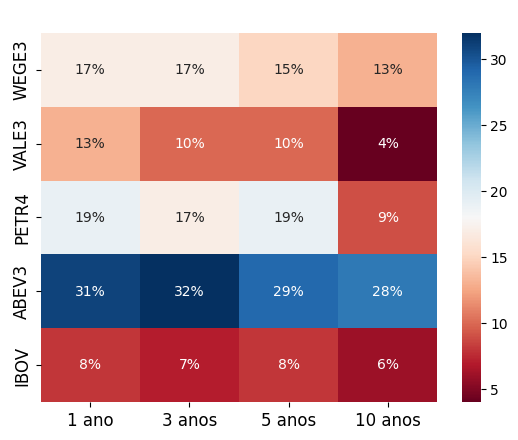

In [6]:
ax = sns.heatmap(tabela_janelas_moveis, annot=True, cmap="RdBu", fmt = "g")

plt.title("Mapa de calor do retorno médio (ao ano) de cada ativo", color = "w")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for t in ax.texts: 
    t.set_text(t.get_text() + "%")

plt.show()

# Mundo 16

Gráfico especial - Mapa de calor quantstats